In [8]:
#Q1
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Load the penguins dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
penguins = pd.read_csv(url)

# Drop rows with missing 'flipper_length_mm' or 'species'
penguins = penguins.dropna(subset=['flipper_length_mm', 'species'])

# Function to create histograms and add statistical markers (mean, median, range, IQR, 2 std deviations)
def plot_histogram_with_stats(df, species_name):
    # Filter by species
    species_df = df[df['species'] == species_name]
    
    # Calculate statistics
    mean_value = species_df['flipper_length_mm'].mean()
    median_value = species_df['flipper_length_mm'].median()
    min_value = species_df['flipper_length_mm'].min()
    max_value = species_df['flipper_length_mm'].max()
    std_value = species_df['flipper_length_mm'].std()
    q1 = species_df['flipper_length_mm'].quantile(0.25)
    q3 = species_df['flipper_length_mm'].quantile(0.75)
    
    # Create the histogram using Plotly Express
    fig = px.histogram(species_df, x='flipper_length_mm', nbins=30, title=f'{species_name} Flipper Length Distribution')
    
    # Add mean and median lines
    fig.add_vline(x=mean_value, line_dash="dash", line_color="green", annotation_text="Mean", annotation_position="top left")
    fig.add_vline(x=median_value, line_dash="dot", line_color="blue", annotation_text="Median", annotation_position="top left")

    # Add the range (min to max) as a shaded area
    fig.add_vrect(x0=min_value, x1=max_value, fillcolor="lightgray", opacity=0.3, line_width=0, annotation_text="Range", annotation_position="bottom left")
    
    # Add the interquartile range (IQR) as a shaded area
    fig.add_vrect(x0=q1, x1=q3, fillcolor="lightblue", opacity=0.3, line_width=0, annotation_text="IQR", annotation_position="bottom left")

    # Add the 2 standard deviations range around the mean as a shaded area
    fig.add_vrect(x0=mean_value - 2*std_value, x1=mean_value + 2*std_value, fillcolor="lightgreen", opacity=0.3, line_width=0, annotation_text="2 Std Dev", annotation_position="bottom left")
    
    # Update the layout and axis labels
    fig.update_layout(
        xaxis_title="Flipper Length (mm)",
        yaxis_title="Count",
        title=f"{species_name} Flipper Length Distribution with Statistics"
    )
    
    # Show the figure
    fig.show()

# Plot histograms for each species
for species in penguins['species'].unique():
    plot_histogram_with_stats(penguins, species)


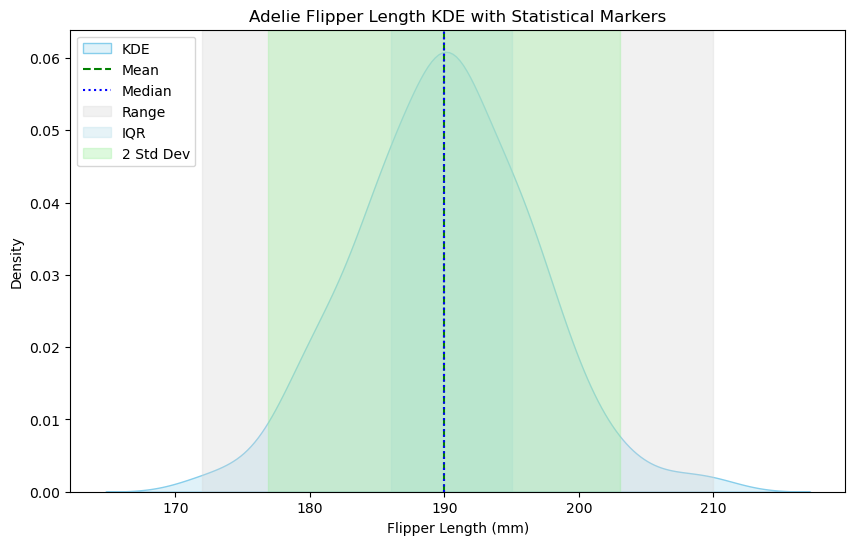

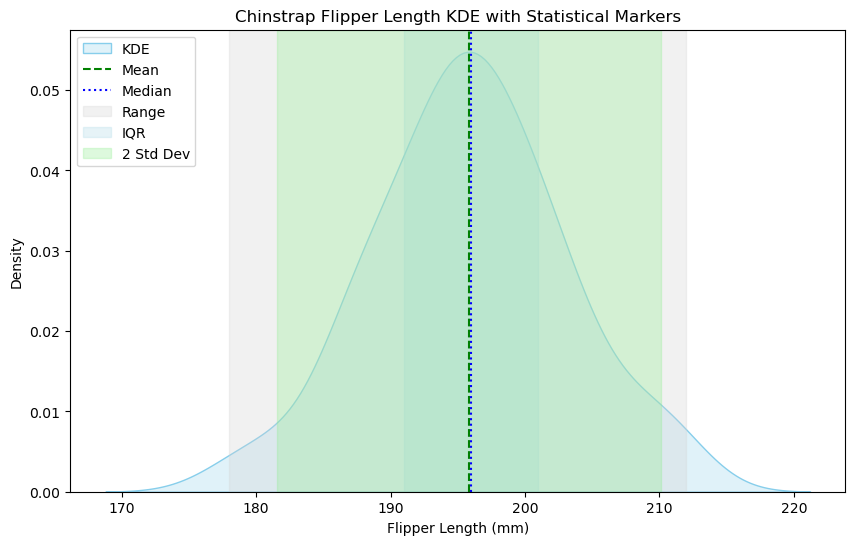

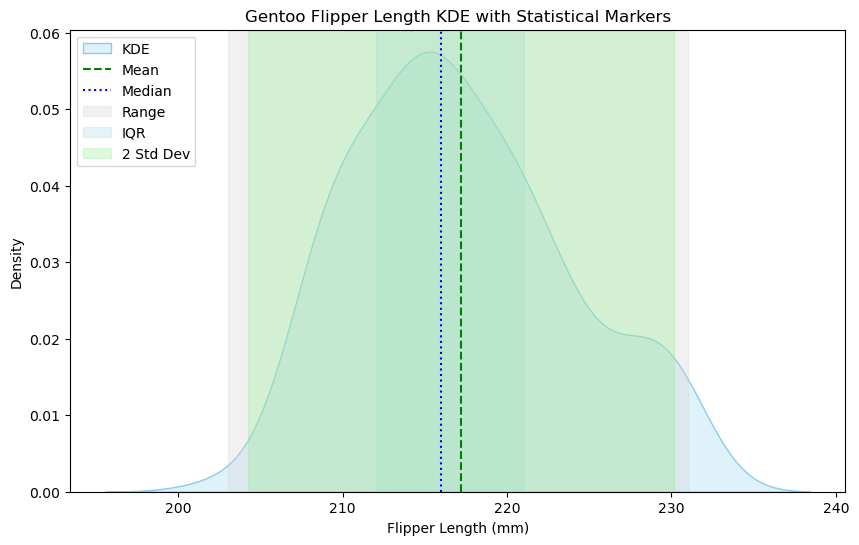

In [9]:
#Q2 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the penguins dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
penguins = pd.read_csv(url)

# Drop rows with missing 'flipper_length_mm' or 'species'
penguins = penguins.dropna(subset=['flipper_length_mm', 'species'])

# Function to create KDE plot and add statistical markers (mean, median, range, IQR, 2 std deviations)
def plot_kde_with_stats(df, species_name):
    # Filter by species
    species_df = df[df['species'] == species_name]
    
    # Calculate statistics
    mean_value = species_df['flipper_length_mm'].mean()
    median_value = species_df['flipper_length_mm'].median()
    min_value = species_df['flipper_length_mm'].min()
    max_value = species_df['flipper_length_mm'].max()
    std_value = species_df['flipper_length_mm'].std()
    q1 = species_df['flipper_length_mm'].quantile(0.25)
    q3 = species_df['flipper_length_mm'].quantile(0.75)
    
    # Create KDE plot using Seaborn
    plt.figure(figsize=(10, 6))
    sns.kdeplot(species_df['flipper_length_mm'], fill=True, color='skyblue', label='KDE')
    
    # Add vertical lines for mean and median
    plt.axvline(mean_value, color='green', linestyle='--', label='Mean')
    plt.axvline(median_value, color='blue', linestyle=':', label='Median')
    
    # Add shaded areas for range, IQR, and ±2 std deviations
    plt.axvspan(min_value, max_value, color='lightgray', alpha=0.3, label='Range')
    plt.axvspan(q1, q3, color='lightblue', alpha=0.3, label='IQR')
    plt.axvspan(mean_value - 2*std_value, mean_value + 2*std_value, color='lightgreen', alpha=0.3, label='2 Std Dev')

    # Add labels and title
    plt.title(f"{species_name} Flipper Length KDE with Statistical Markers")
    plt.xlabel("Flipper Length (mm)")
    plt.ylabel("Density")
    plt.legend(loc="upper left")
    
    # Show the plot
    plt.show()

# Plot KDE for each species
for species in penguins['species'].unique():
    plot_kde_with_stats(penguins, species)


In [10]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS


In [11]:
#Q4
# 1. A and C
# 2. B and C or A and C
# 3. B and D
# 4. A and D or C and D

In [13]:
# https://chatgpt.com/share/66eb91a8-daa0-8012-a410-9f72c1d40bb1
# Here’s a summary of the prompts you've asked today, excluding the Monty Hall problem:
#
#1. **Plotting Statistical Measures**: You asked for code to create Plotly histograms of `flipper_length_mm` for each 
# species in the penguins dataset, marking locations (mean and median) and scales (range, interquartile range, and ±2 
# standard deviations) using `fig.add_vline()` and `fig.add_vrect()`.
#
#2. **Seaborn KDE Plot**: You then requested to modify the previous prompt to use Seaborn's Kernel Density Estimation plot 
#    instead of histograms, incorporating similar statistical markers.
#
#3. **KDE with Statistical Markers**: You wanted to create a Seaborn KDE plot that includes the same statistical markers 
# (mean, median, range, IQR, and ±2 standard deviations) as used in the histogram plot.
#
#4. **Discussion on Visualization Preferences**: You expressed your preference for using KDE plots due to their fluidity, 
# capability to handle multiple variables, and accuracy in depicting datasets.

In [14]:
#Q5
# ChatBot:
# Mean: The arithmetic average of a set of values, calculated by summing all the values and dividing by the number of 
# values.
# Median: The middle value of a dataset when it is ordered from smallest to largest. If there is an even number of 
# observations, the median is the average of the two middle values.
# Right Skewed (Positive Skew): In a right-skewed distribution, where a few high values pull the mean upward, the mean is 
# greater than the median.
# Left Skewed (Negative Skew): In a left-skewed distribution, where a few low values pull the mean downward, the mean is 
# less than the median.
# Why: The mean is sensitive to extreme values (outliers), which can distort its value. In contrast, the median is resistant
# to outliers because it depends solely on the middle position(s) of the data. Therefore, in skewed distributions, the mean 
# tends to shift in the direction of the skew, while the median remains more stable, providing a better measure of central 
# tendency in such cases.

In [22]:
import plotly.express as px
df = px.data.gapminder()
px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])

In [27]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/manuelamc14/fast-food-Nutritional-Database/main/Tables/nutrition.csv")
df # df.columns

,restaurant id,category id,item id,serving size (oz),calories,calories from fat,total fat (g),total fat (% daily value),saturated fat (g),saturated fat (% daily value),...,carbohydrates (g),carbohydrates (% daily value),dietary fiber (g),dietary fiber (% daily value),sugars (g),protein (g),vitamin a (% daily value),vitamin c (% daily value),calcium (% daily value),iron (% daily value)
0,1000,100,0,4.8,300,120.0,13.0,20.0,5.0,25.0,...,31,10.0,4,17.0,3.0,17.0,10.0,0.0,25.0,15.0
1,1000,100,1,4.8,250,70.0,8.0,12.0,3.0,15.0,...,30,10.0,4,17.0,3.0,18.0,6.0,0.0,25.0,8.0
2,1000,100,2,3.9,370,200.0,23.0,35.0,8.0,42.0,...,29,10.0,4,17.0,2.0,14.0,8.0,0.0,25.0,10.0
3,1000,100,3,5.7,450,250.0,28.0,43.0,10.0,52.0,...,30,10.0,4,17.0,2.0,21.0,15.0,0.0,30.0,15.0
4,1000,100,4,5.7,400,210.0,23.0,35.0,8.0,42.0,...,30,10.0,4,17.0,2.0,21.0,6.0,0.0,25.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,3000,130,745,NaN,180,NaN,14.0,NaN,NaN,NaN,...,12,NaN,3,NaN,NaN,4.0,NaN,NaN,NaN,NaN
746,3000,130,746,NaN,190,NaN,18.0,NaN,NaN,NaN,...,6,NaN,3,NaN,NaN,7.0,NaN,NaN,NaN,NaN
747,3000,100,747,NaN,340,NaN,13.0,NaN,NaN,NaN,...,38,NaN,0,NaN,NaN,18.0,NaN,NaN,NaN,NaN
748,3000,100,748,NaN,90,NaN,8.0,NaN,NaN,NaN,...,5,NaN,4,NaN,NaN,1.0,NaN,NaN,NaN,NaN


In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the nutritional database
url = "https://raw.githubusercontent.com/manuelamc14/fast-food-Nutritional-Database/main/Tables/nutrition.csv"
nutrition_data = pd.read_csv(url)

# Display the first few rows of the dataset and check for missing values
print(nutrition_data.head())
print(nutrition_data.info())

# Summary statistics for numerical columns
summary_stats = nutrition_data.describe()
print(summary_stats)

# Visualization of calories distribution
plt.figure(figsize=(10, 6))
sns.histplot(nutrition_data['Calories'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Calories in Fast Food Items')
plt.xlabel('Calories')
plt.ylabel('Frequency')

# Add mean and median lines
plt.axvline(nutrition_data['Calories'].mean(), color='green', linestyle='--', label='Mean')
plt.axvline(nutrition_data['Calories'].median(), color='blue', linestyle=':', label='Median')
plt.legend()
plt.show()

# Box plot for calories by restaurant
plt.figure(figsize=(12, 6))
sns.boxplot(data=nutrition_data, x='Restaurant', y='Calories')
plt.title('Calories by Restaurant')
plt.xticks(rotation=45)
plt.ylabel('Calories')
plt.show()

# Scatter plot for calories vs. fat content
plt.figure(figsize=(10, 6))
sns.scatterplot(data=nutrition_data, x='Total Fat', y='Calories', hue='Restaurant', alpha=0.7)
plt.title('Calories vs. Total Fat Content')
plt.xlabel('Total Fat (g)')
plt.ylabel('Calories')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Heatmap of correlation between numerical features
plt.figure(figsize=(10, 8))
correlation_matrix = nutrition_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Nutritional Features')
plt.show()


   restaurant id  category id  item id  serving size (oz)  calories  \
0           1000          100        0                4.8       300   
1           1000          100        1                4.8       250   
2           1000          100        2                3.9       370   
3           1000          100        3                5.7       450   
4           1000          100        4                5.7       400   

   calories from fat total fat (g)  total fat (% daily value)  \
0              120.0          13.0                       20.0   
1               70.0           8.0                       12.0   
2              200.0          23.0                       35.0   
3              250.0          28.0                       43.0   
4              210.0          23.0                       35.0   

   saturated fat (g)  saturated fat (% daily value)  ...  carbohydrates (g)  \
0                5.0                           25.0  ...                 31   
1                3.0    

KeyError: 'Calories'

<Figure size 1000x600 with 0 Axes>